# Sampling Methods

In [16]:
import os, sys
import networkx as nx
import random

src_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
sys.path.insert(0, src_path)

import scripts.graph_utils as gru

In [17]:
G = gru.read_directed_graph_from_edge_list("../../data/tests/synthetic2.edges")

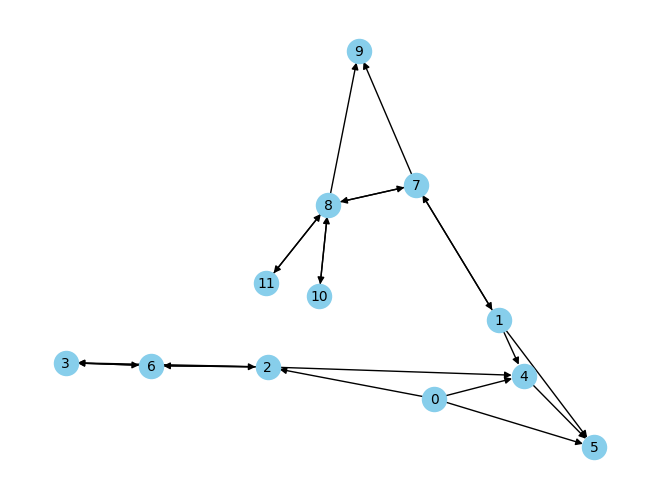

In [18]:
gru.draw_graph(G, seed=5)

## Random Node (RN)

- very intuitive, randomly select the nodes and get the induced subgraph of them
- it fails to capture intricacies of a graph's topology

In [19]:
def get_sample_rn(original_graph, sample_percent, seed=42):
    """
    Generates a random sample of original_graph with sample_percent (%).
    The sample_percent is the percentage of nodes from the original_graph.
    Random Node (RN): Selects a random sample of nodes from the input graph
    and includes all edges between the sampled nodes.

    Parameters:
        original_graph (NetworkX graph): The input graph to sample from.
        sample_percent (int): The number of nodes to sample.

    Returns:
        nx.Graph(): NetworkX random sample of the input graph.
    """

    # Directed or Undirected graph
    sample = nx.DiGraph() if original_graph.is_directed() else nx.Graph()

    nodes_list = list(original_graph.nodes())

    # Sample nodes using the seed
    random.seed(seed)
    sample_nodes = random.sample(nodes_list, int(sample_percent * len(nodes_list)))

    # Add all sampled nodes to the sample graph
    sample = original_graph.subgraph(sample_nodes)

    # Create a copy to avoid frozen graph
    sample_graph = (
        nx.DiGraph(sample) if original_graph.is_directed() else nx.Graph(sample)
    )

    # Remove isolated nodes
    sample_graph.remove_nodes_from(list(nx.isolates(sample)))

    return sample_graph

In [20]:
def get_sample_rdn(original_graph, sample_percent, seed=42):
    """
    Generates a random sample of original_graph with sample_percent (%).
    The sample_percent is the percentage of nodes from the original_graph.
    Random Degree Node (RDN): Selects a random sample of nodes from the input graph
    and includes all edges between the sampled nodes. Each node has a
    probability of getting selected that is proportional to its degree.

    Parameters:
        original_graph (NetworkX graph): The input graph to sample from.
        sample_percent (int): The number of nodes to sample.

    Returns:
        nx.Graph(): NetworkX random sample of the input graph.
    """

    # Directed or Undirected graph
    sample = nx.DiGraph() if original_graph.is_directed() else nx.Graph()

    nodes_list = list(original_graph.nodes())

    # Sample nodes using the seed
    random.seed(seed)

    nodes_probabilities = [i[1] for i in original_graph.degree(nodes_list)]
    sample_nodes = random.choices(
        nodes_list, nodes_probabilities, k=int(len(nodes_list) * sample_percent)
    )

    # Add all sampled nodes to the sample graph
    sample = original_graph.subgraph(sample_nodes)

    # Create a copy to avoid frozen graph
    sample_graph = (
        nx.DiGraph(sample) if original_graph.is_directed() else nx.Graph(sample)
    )

    # Remove isolated nodes
    sample_graph.remove_nodes_from(list(nx.isolates(sample)))

    return sample_graph

In [21]:
def get_sample_rpn(original_graph, sample_percent, seed=42):
    """
    Generates a random sample of original_graph with sample_percent (%).
    The sample_percent is the percentage of nodes from the original_graph.
    Random Page Rank Node (RDN): Selects a random sample of nodes from the 
    input graph and includes all edges between the sampled nodes. Each node has 
    a probability of getting selected that is proportional to its page-rank.

    Parameters:
        original_graph (NetworkX graph): The input graph to sample from.
        sample_percent (int): The number of nodes to sample.

    Returns:
        nx.Graph(): NetworkX random sample of the input graph.
    """

    # Directed or Undirected graph
    sample = nx.DiGraph() if original_graph.is_directed() else nx.Graph()

    nodes_list = list(original_graph.nodes())

    # Sample nodes using the seed
    random.seed(seed)

    nodes_probabilities = list(nx.pagerank(original_graph).values())
    sample_nodes = random.choices(
        nodes_list, nodes_probabilities, k=int(len(nodes_list) * sample_percent)
    )

    # Add all sampled nodes to the sample graph
    sample = original_graph.subgraph(sample_nodes)

    # Create a copy to avoid frozen graph
    sample_graph = (
        nx.DiGraph(sample) if original_graph.is_directed() else nx.Graph(sample)
    )

    # Remove isolated nodes
    sample_graph.remove_nodes_from(list(nx.isolates(sample)))

    return sample_graph

In [22]:
def get_sample_re(original_graph, sample_percent, seed=42):
    """
    Generates a random sample of original_graph with sample_percent (%).
    The sample_percent is the percentage of nodes from the original_graph.
    Random Edge (RE): Selects a random sample of edges from the 
    input graph.

    Parameters:
        original_graph (NetworkX graph): The input graph to sample from.
        sample_percent (int): The number of nodes to sample.

    Returns:
        nx.Graph(): NetworkX random sample of the input graph.
    """

    # Directed or Undirected graph
    sample_graph = nx.DiGraph() if original_graph.is_directed() else nx.Graph()

    edges_list = list(original_graph.edges())

    # Sample nodes using the seed
    random.seed(seed)

    sample_edges = random.sample(edges_list, int(len(edges_list) * sample_percent))

    # Add all sampled nodes to the sample graph
    sample_graph.add_edges_from(sample_edges) 

    return sample_graph

In [23]:
def get_sample_rne(original_graph, sample_percent, seed=42):
    """
    Generates a random sample of original_graph with sample_percent (%).
    The sample_percent is the percentage of nodes from the original_graph.
    Random Node-Edge (RNE): Selects a random node and a random incident edge.

    Parameters:
        original_graph (NetworkX graph): The input graph to sample from.
        sample_percent (int): The number of nodes to sample.

    Returns:
        nx.Graph(): NetworkX random sample of the input graph.
    """

    # Directed or Undirected graph
    sample = nx.DiGraph() if original_graph.is_directed() else nx.Graph()

    nodes_list = list(original_graph.nodes())

    # Sample nodes using the seed
    random.seed(seed)

    sampled_origin_nodes = random.choices(
        nodes_list, k=int(len(nodes_list) * sample_percent)
    )
    sampled_nodes = set(sampled_origin_nodes)

    for s in sampled_origin_nodes:
        neighbors = list(original_graph.neighbors(s))
        if neighbors:
            selected_neighbor = random.sample(list(original_graph.neighbors(s)), 1)[0]
            sampled_nodes.add(selected_neighbor)

    # Add all sampled nodes to the sample graph
    sample = original_graph.subgraph(list(sampled_nodes))

    # Create a copy to avoid frozen graph
    sample_graph = (
        nx.DiGraph(sample) if original_graph.is_directed() else nx.Graph(sample)
    )

    return sample_graph

In [24]:
def get_sample_hyb(original_graph, sample_percent, P=0.5, seed=42):
    """
    Generates a hybrid random sample of original_graph with sample_percent (%).
    The sample_percent is the percentage of edges from the original_graph.
    Hybrid (HYB): Combines Random Node-Edge (RNE) and Random Edge (RE) 
    with probability P and (1-P), respectively.

    Parameters:
        original_graph (NetworkX graph): The input graph to sample from.
        sample_percent (float): The percentage of edges to sample.
        P (float): The probability of using RNE. RE is used with probability (1-P).
        seed (int): Seed for random sampling.

    Returns:
        nx.Graph(): NetworkX hybrid sample of the input graph.
    """

    # Directed or Undirected graph
    sample_graph = nx.DiGraph() if original_graph.is_directed() else nx.Graph()

    edges_list = list(original_graph.edges())
    nodes_list = list(original_graph.nodes())

    # Number of edges and nodes to sample
    num_edges_to_sample = int(len(edges_list) * sample_percent)

    # Set random seed
    random.seed(seed)

    sampled_edges = set()
    sampled_nodes = set()

    while len(sampled_edges) < num_edges_to_sample:
        # Decide whether to use RNE or RE based on probability P
        if random.random() < P:
            # Use Random Node-Edge (RNE)
            node = random.choice(nodes_list)
            neighbors = list(original_graph.neighbors(node))
            if neighbors:
                neighbor = random.choice(neighbors)
                sampled_edges.add((node, neighbor))
                sampled_nodes.add(node)
                sampled_nodes.add(neighbor)
        else:
            # Use Random Edge (RE)
            edge = random.choice(edges_list)
            sampled_edges.add(edge)
            sampled_nodes.add(edge[0])
            sampled_nodes.add(edge[1])

    # Add sampled edges to the sample graph
    sample_graph.add_edges_from(sampled_edges)

    return sample_graph

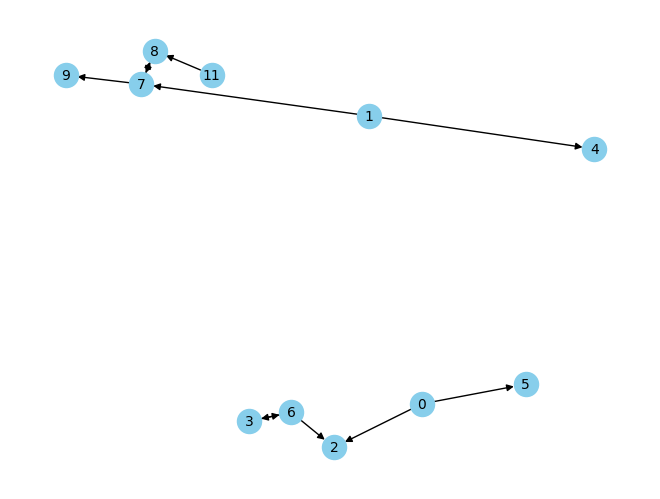

In [25]:
gru.draw_graph(get_sample_hyb(G, sample_percent=0.5))

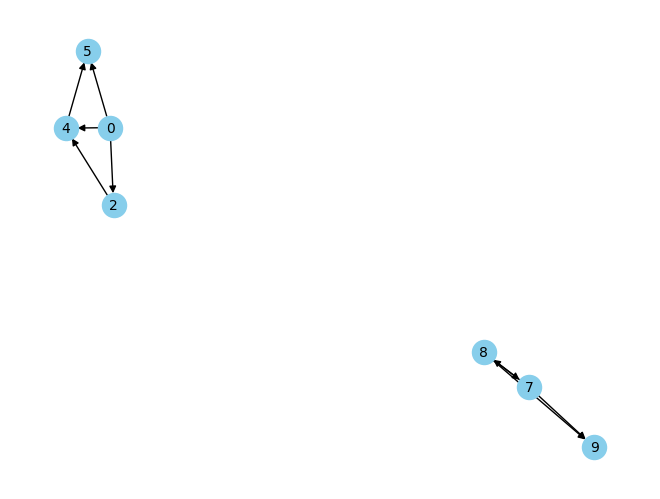

In [26]:
gru.draw_graph(get_sample_rne(G, sample_percent=0.5))

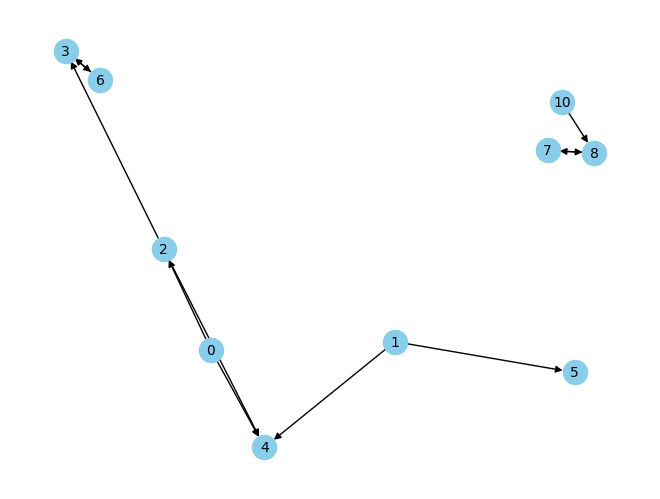

In [27]:
gru.draw_graph(get_sample_re(G, sample_percent=0.5))

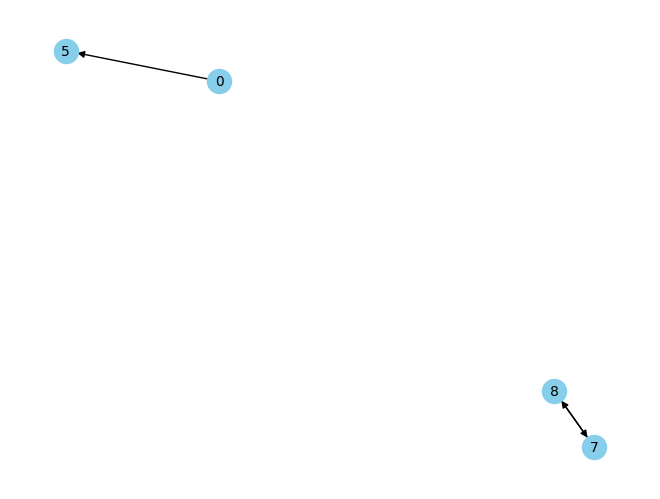

In [28]:
gru.draw_graph(get_sample_rpn(G, sample_percent=0.5))

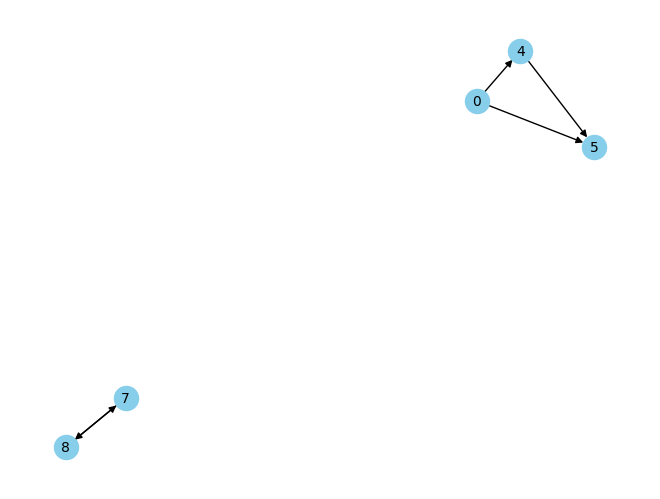

In [29]:
gru.draw_graph(get_sample_rdn(G, sample_percent=0.5))

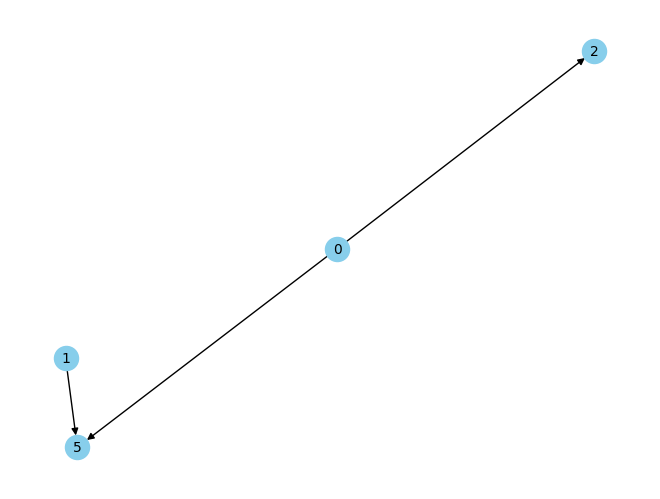

In [30]:
gru.draw_graph(get_sample_rn(G, sample_percent=0.5))